In [1]:
!pip install pandas numpy matplotlib seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import os

In [2]:
os.chdir('/Users/rimpa/Downloads/masters_project')

In [3]:
data = pd.read_csv("amazon_reviews.txt", delimiter = "\t")

In [4]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [5]:
data.loc[data["LABEL"] == "__label1__", "LABEL_DESC"] = 'Fake'
data.loc[data["LABEL"] == "__label2__", "LABEL_DESC"] = 'Real'

In [6]:
len(data)

21000

In [7]:
cnt_srs = data.groupby(data["LABEL_DESC"]).RATING.value_counts()
cnt_srs

LABEL_DESC  RATING
Fake        5         6059
            4         1999
            3          926
            1          889
            2          627
Real        5         6151
            4         1974
            3          942
            1          868
            2          565
Name: RATING, dtype: int64

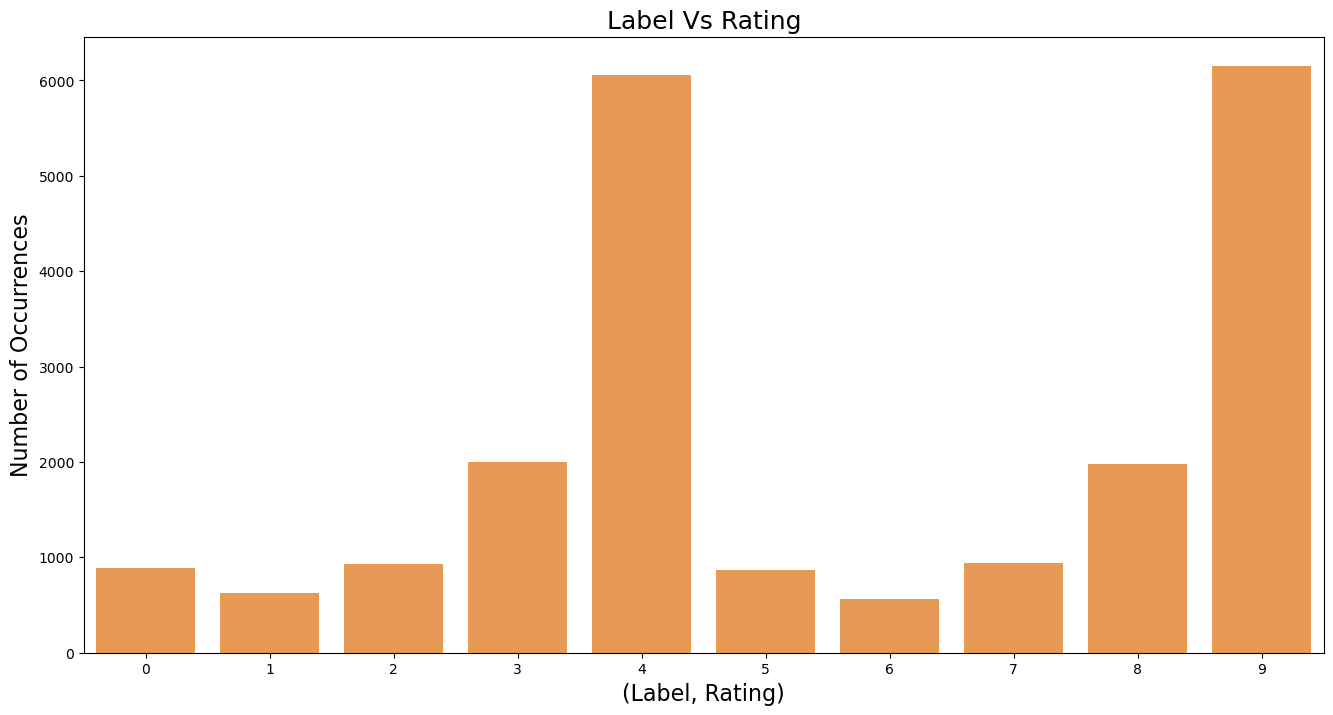

In [13]:
cnt_srs = data.groupby(['LABEL_DESC', 'RATING']).size()
cnt_srs = cnt_srs.rename_axis(['LABEL_DESC', 'RATING']).reset_index(name='COUNT')

plt.figure(figsize=(16,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs['COUNT'], alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Rating)', fontsize=16)
plt.title('Label Vs Rating', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

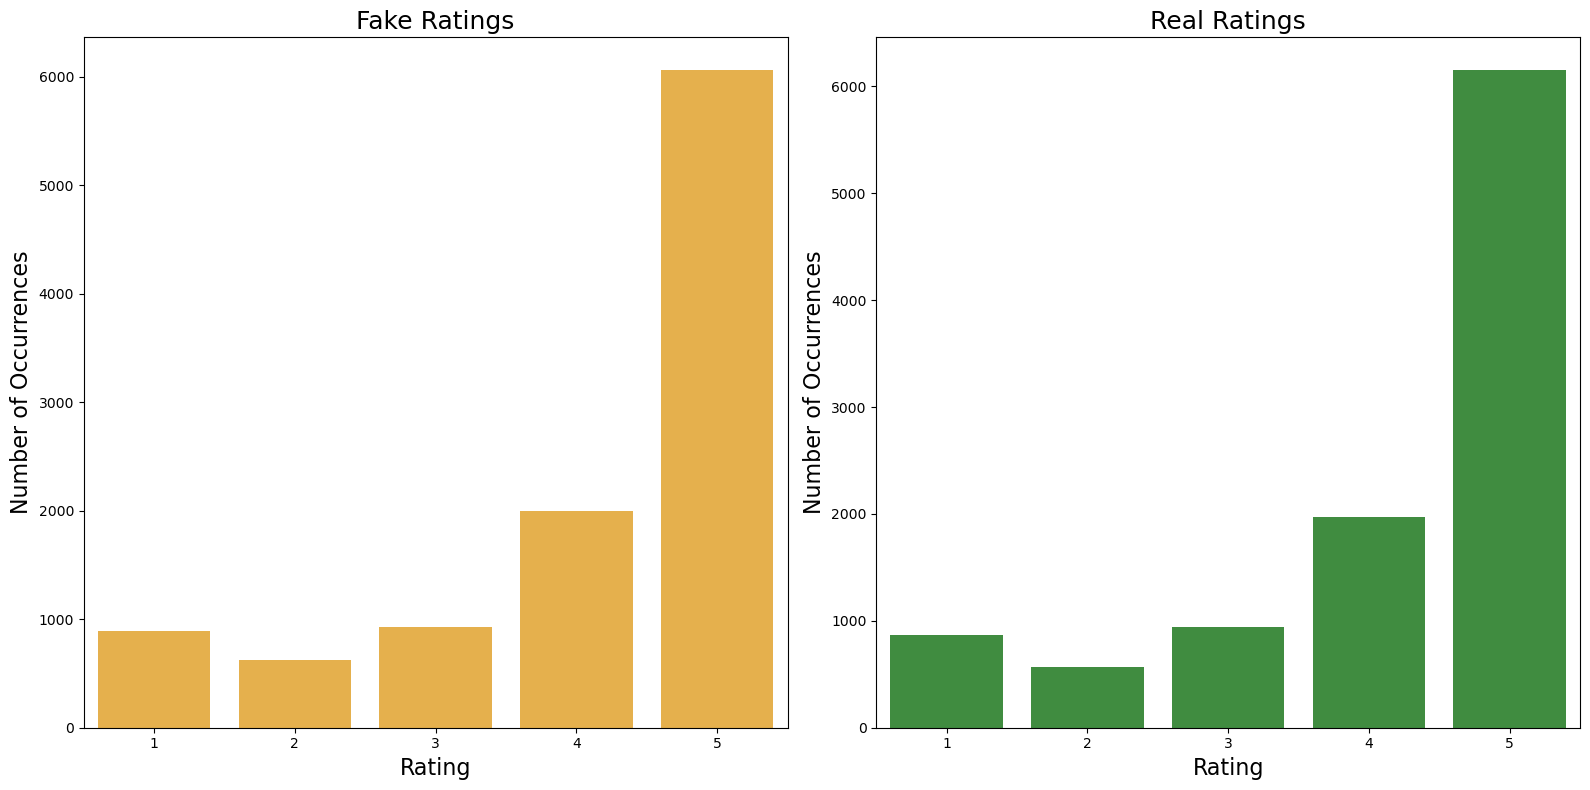

In [9]:
# Grouping and renaming the columns
cnt_srs = data.groupby(['LABEL_DESC', 'RATING']).size()
cnt_srs = cnt_srs.rename_axis(['LABEL_DESC', 'RATING']).reset_index(name='COUNT')

# Filtering data for Fake and Real labels
fake_data = cnt_srs[cnt_srs['LABEL_DESC'] == 'Fake']
real_data = cnt_srs[cnt_srs['LABEL_DESC'] == 'Real']

plt.figure(figsize=(16,8))

# Plotting Fake ratings count in orange
plt.subplot(1, 2, 1)
sns.barplot(x=fake_data['RATING'], y=fake_data['COUNT'], alpha=0.8, color='orange')
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Rating', fontsize=16)
plt.title('Fake Ratings', fontsize=18)
plt.xticks(rotation='horizontal')

# Plotting Real ratings count in green
plt.subplot(1, 2, 2)
sns.barplot(x=real_data['RATING'], y=real_data['COUNT'], alpha=0.8, color='green')
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Rating', fontsize=16)
plt.title('Real Ratings', fontsize=18)
plt.xticks(rotation='horizontal')

plt.tight_layout()
plt.show()


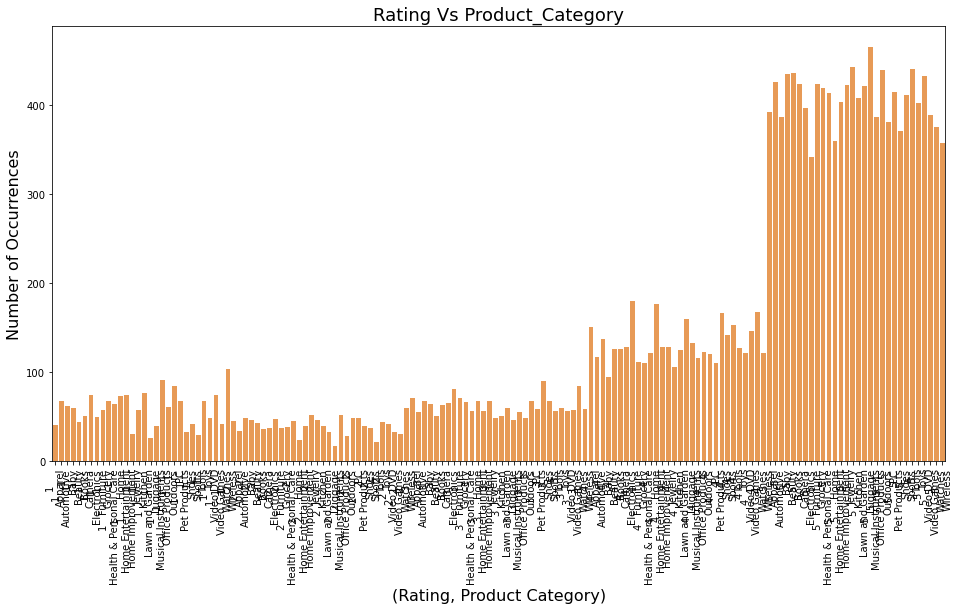

In [11]:
cnt_srs = data.groupby(["RATING", "PRODUCT_CATEGORY"]).size().reset_index(name='counts')

plt.figure(figsize=(16,8))
sns.barplot(x=cnt_srs["RATING"].astype(str) + '\n' + cnt_srs["PRODUCT_CATEGORY"].astype(str), y=cnt_srs["counts"], alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Rating, Product Category)', fontsize=16)
plt.title('Rating Vs Product_Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
# Grouping data by product category and rating, then counting occurrences
rating_counts = data.groupby(['PRODUCT_CATEGORY', 'RATING']).size().unstack(fill_value=0)

# Selecting only ratings 1 and 5
ratings_1 = rating_counts[1]
ratings_5 = rating_counts[5]

# Sorting categories based on rating counts
top_5_categories_highest_rating_5 = ratings_5.sort_values(ascending=False).head(5)
top_5_categories_lowest_rating_1 = ratings_1.sort_values(ascending=False).head(5)

# Get counts for top 5 ratings
top_5_counts_highest_rating_5 = top_5_categories_highest_rating_5.values
top_5_counts_lowest_rating_1 = top_5_categories_lowest_rating_1.values

# Creating DataFrame for top 5 categories and counts
top_5_ratings_highest = pd.DataFrame({'Category': top_5_categories_highest_rating_5.index, 'Count': top_5_counts_highest_rating_5})
top_5_ratings_lowest = pd.DataFrame({'Category': top_5_categories_lowest_rating_1.index, 'Count': top_5_counts_lowest_rating_1})

print("Top 5 product categories with the highest rating of 5 and their counts:")
print(top_5_ratings_highest.to_string(index=False))

print("\nTop 5 product categories with the lowest rating of 1 and their counts:")
print(top_5_ratings_lowest.to_string(index=False))


Top 5 product categories with the highest rating of 5 and their counts:
           Category  Count
Musical Instruments    465
            Kitchen    443
              Tools    440
           Outdoors    439
              Books    436

Top 5 product categories with the lowest rating of 1 and their counts:
        Category  Count
        Wireless    103
 Office Products     91
              PC     84
 Lawn and Garden     77
Home Improvement     74


In [18]:
rating_counts

RATING,1,2,3,4,5
PRODUCT_CATEGORY,,,,,
Apparel,41,45,71,151,392
Automotive,68,34,55,117,426
Baby,62,48,67,137,386
Beauty,60,46,64,95,435
Books,44,43,51,126,436
Camera,51,36,63,126,424
Electronics,74,37,65,128,396
Furniture,50,47,81,180,342
Grocery,58,37,71,111,423


In [14]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL_DESC.value_counts().reset_index(name='counts')
cnt_srs

,VERIFIED_PURCHASE,LABEL_DESC,counts
0,N,Fake,7623
1,N,Real,1679
2,Y,Real,8821
3,Y,Fake,2877


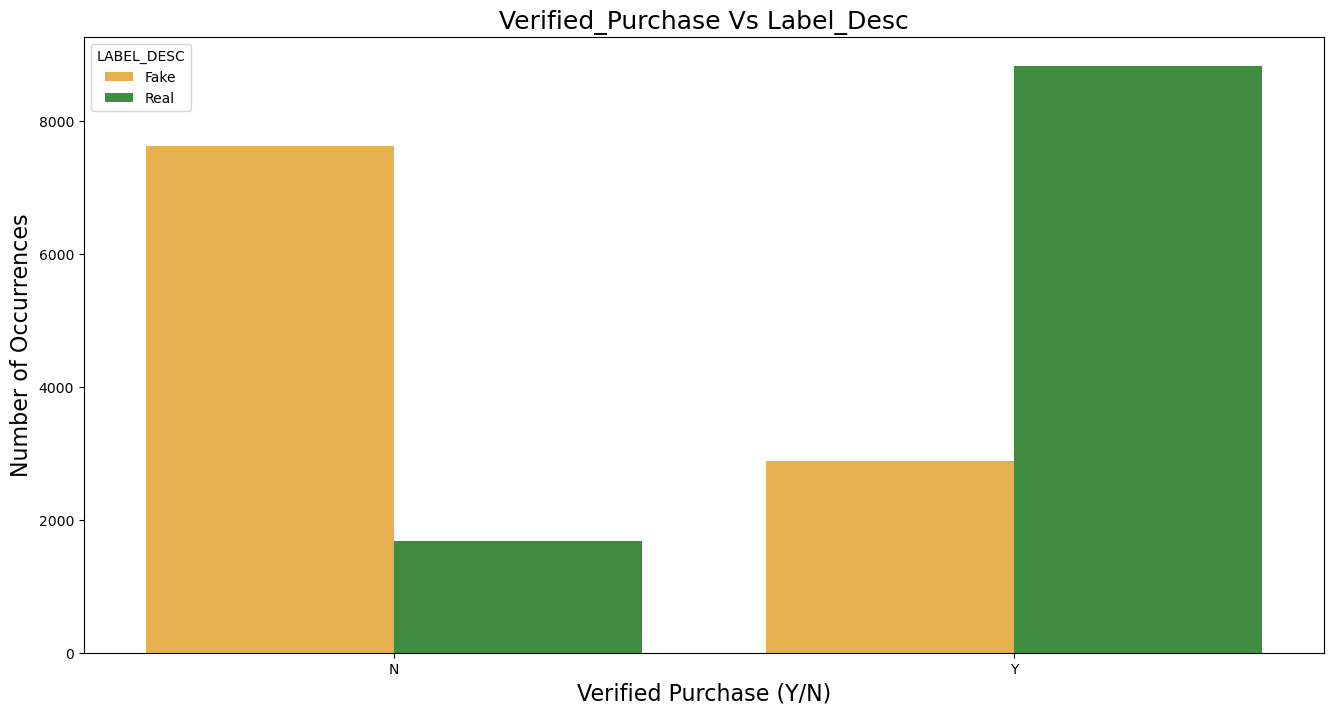

In [18]:
colors = {"Fake": "red", "Real": "green"}

plt.figure(figsize=(16, 8))
sns.barplot(x="VERIFIED_PURCHASE", y="counts", hue="LABEL_DESC", data=cnt_srs, alpha=0.8, palette=colors)
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Verified Purchase (Y/N)', fontsize=16)
plt.title('Verified_Purchase Vs Label_Desc', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [26]:
cnt_srs = data.groupby("PRODUCT_CATEGORY").LABEL_DESC.value_counts().reset_index(name='counts')
cnt_srs

,PRODUCT_CATEGORY,LABEL_DESC,counts
0,Apparel,Fake,350
1,Apparel,Real,350
2,Automotive,Fake,350
3,Automotive,Real,350
4,Baby,Fake,350
5,Baby,Real,350
6,Beauty,Fake,350
7,Beauty,Real,350
8,Books,Fake,350
9,Books,Real,350


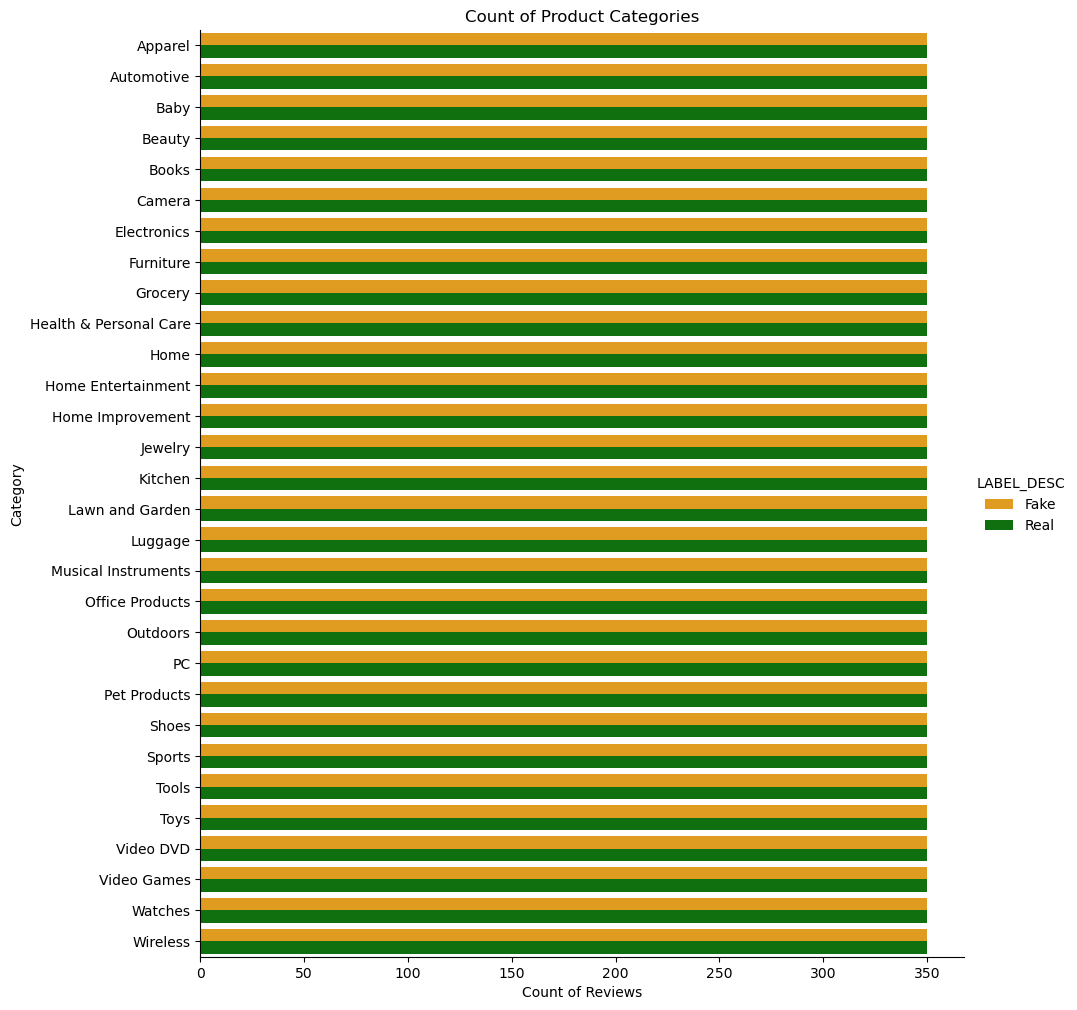

In [37]:
# Assuming cnt_srs is your DataFrame with columns PRODUCT_CATEGORY, LABEL_DESC, and counts
colors = {"Fake": "orange", "Real": "green"}
sns.catplot(x='counts', y='PRODUCT_CATEGORY', hue='LABEL_DESC', kind='bar', data=cnt_srs, orient='h', height=10, palette=colors)
plt.xlabel('Count of Reviews')
plt.ylabel('Category')
plt.title('Count of Product Categories')
plt.show()


In [14]:
df1 = data.groupby("LABEL").REVIEW_TEXT

In [38]:
data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)


In [44]:
cnt_srs = data.groupby(["LABEL_DESC"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL_DESC
Fake    316.538857
Real    428.064571
Name: TEXT_LENGTH, dtype: float64

In [40]:
data

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,LABEL_DESC,TEXT_LENGTH
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",Fake,116
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,Fake,404
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,Fake,248
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,Fake,212
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,Fake,331
...,...,...,...,...,...,...,...,...,...,...,...
20995,20996,__label2__,4,Y,Shoes,B00BXYM8T8,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ...",Real,100
20996,20997,__label2__,4,Y,Shoes,B0014C2ORK,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...,Real,115
20997,20998,__label2__,5,Y,Shoes,B000EX8CCQ,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...,Real,297
20998,20999,__label2__,5,Y,Shoes,B00748YHVE,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...,Real,287


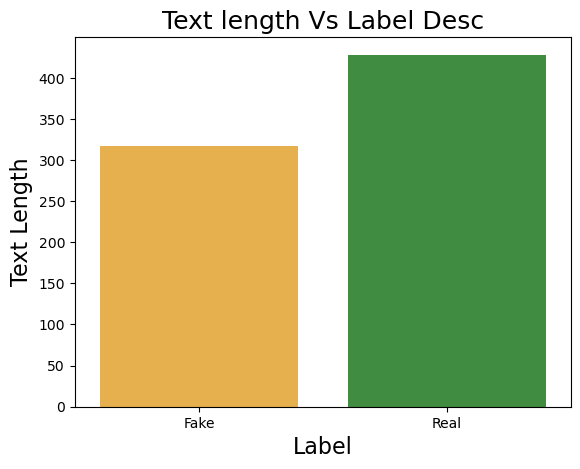

In [46]:
colors = {"Fake": "orange", "Real": "green"}

# Assuming cnt_srs is your Series containing the data
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, palette=colors)
plt.ylabel('Text Length', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Text length Vs Label Desc', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()
